In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Ezequiel Vannucchi\Desktop\UTN\Cs de datos\DataSets\tp\dataset_final_carajo_3.csv')
df.head()

,Unnamed: 0,fecha,hora,co_la_boca,no2_la_boca,pm10_la_boca,fecha-hora,Flujo en Sentido A,Flujo en Sentido B,HORA,TEMP,HUM,PNM,DD,FF,weekday,dia de la semana
0,0,1/1/2019,1,0.48,10.0,23.0,2019-01-01 01,2397.0,1771.0,1.0,25.9,64.0,1010.6,70.0,19.0,Tuesday,2
1,1,1/1/2019,2,0.46,11.0,23.0,2019-01-01 02,3013.0,2384.0,2.0,25.4,67.0,1010.4,70.0,19.0,Tuesday,2
2,2,1/1/2019,3,0.46,12.0,23.0,2019-01-01 03,2098.0,1835.0,3.0,24.7,71.0,1010.5,50.0,20.0,Tuesday,2
3,3,1/1/2019,4,0.46,11.0,24.0,2019-01-01 04,1165.0,1254.0,4.0,24.1,75.0,1010.2,50.0,17.0,Tuesday,2
4,4,1/1/2019,5,0.45,9.0,24.0,2019-01-01 05,1176.0,1026.0,5.0,23.7,80.0,1010.8,70.0,17.0,Tuesday,2


In [3]:
df.drop(columns=['HORA','Unnamed: 0'], inplace=True)
print(df.shape)
print(df.isnull().sum())

(2868, 15)
fecha                   0
hora                    0
co_la_boca             63
no2_la_boca           404
pm10_la_boca          171
fecha-hora              0
Flujo en Sentido A    543
Flujo en Sentido B    543
TEMP                  101
HUM                   101
PNM                   101
DD                    101
FF                    101
weekday                 0
dia de la semana        0
dtype: int64


Se analiza la prescencia de NaNs en el dataset y se eliminan los sobrantes

In [4]:
df_clean = df.dropna(subset=['Flujo en Sentido A'])
print(df_clean.isnull().sum())
print(df_clean.shape)

fecha                   0
hora                    0
co_la_boca             55
no2_la_boca           266
pm10_la_boca          128
fecha-hora              0
Flujo en Sentido A      0
Flujo en Sentido B      0
TEMP                   96
HUM                    96
PNM                    96
DD                     96
FF                     96
weekday                 0
dia de la semana        0
dtype: int64
(2325, 15)


In [5]:
df_clean = df_clean.dropna(subset=['FF'])
print(df_clean.isnull().sum())
print(df_clean.shape)

fecha                   0
hora                    0
co_la_boca             55
no2_la_boca           243
pm10_la_boca          125
fecha-hora              0
Flujo en Sentido A      0
Flujo en Sentido B      0
TEMP                    0
HUM                     0
PNM                     0
DD                      0
FF                      0
weekday                 0
dia de la semana        0
dtype: int64
(2229, 15)


Se procede a realizar el EDA del dataset como una primera aproximacion

C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


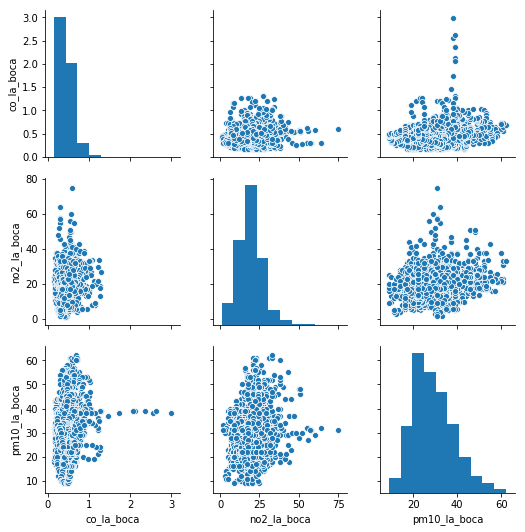

In [6]:
sns.pairplot(data=df_clean[['co_la_boca','no2_la_boca','pm10_la_boca','weekday']],)

In [7]:
#Remocion de outliers
co_q95 = df_clean['co_la_boca'].quantile(0.95)
no2_q95 = df_clean['no2_la_boca'].quantile(0.95)
pm10_q95 = df_clean['pm10_la_boca'].quantile(0.95)

df_clean2 = df_clean.loc[df_clean['co_la_boca']< co_q95]
df_clean2 = df_clean2.loc[df_clean2['co_la_boca']< no2_q95]
df_clean2 = df_clean2.loc[df_clean2['co_la_boca']< pm10_q95]

df_clean2.shape

(2064, 15)

<Figure size 432x288 with 0 Axes>

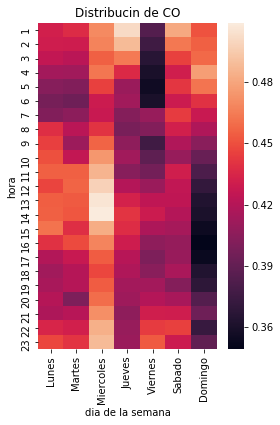

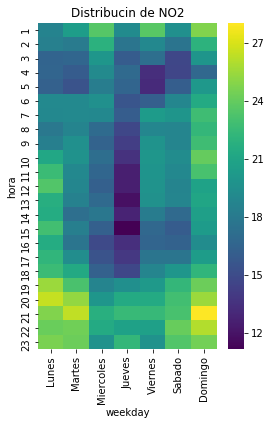

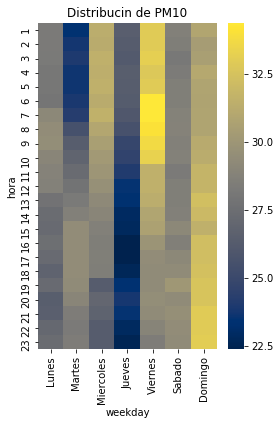

In [8]:
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is

df_eda_co = pd.pivot_table(data=df_clean2,columns='dia de la semana',index='hora',values='co_la_boca',aggfunc='mean')
plt.figure(figsize=(4,6))
plt.title('Distribucin de CO')
ax =sns.heatmap(df_eda_co,xticklabels=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])


df_eda_no2 = pd.pivot_table(data=df_clean2,columns='weekday',index='hora',values='no2_la_boca',aggfunc='mean')
plt.figure(figsize=(4,6))
plt.title('Distribucin de NO2')
sns.heatmap(df_eda_no2,cmap='viridis',xticklabels=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])

df_eda_pm10 = pd.pivot_table(data=df_clean2,columns='weekday',index='hora',values='pm10_la_boca',aggfunc='mean')
plt.figure(figsize=(4,6))
plt.title('Distribucin de PM10')
sns.heatmap(df_eda_pm10,cmap='cividis',xticklabels=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])

#cividis, summer,viridis,winter,vlag

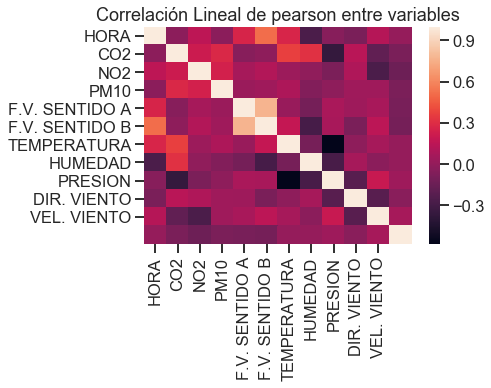

In [9]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(df_clean2.corr(),yticklabels=['HORA','CO2','NO2','PM10','F.V. SENTIDO A','F.V. SENTIDO B','TEMPERATURA','HUMEDAD','PRESION','DIR. VIENTO','VEL. VIENTO'],xticklabels=['HORA','CO2','NO2','PM10','F.V. SENTIDO A','F.V. SENTIDO B','TEMPERATURA','HUMEDAD','PRESION','DIR. VIENTO','VEL. VIENTO'])
plt.title("Correlación Lineal de pearson entre variables")
plt.show()

Se realiza feature engineering para generar dummies y extraer los valores faltantes de las variables dependientes

In [10]:
df_dum_day = pd.get_dummies(df_clean['weekday'])
df_dum_hour = pd.get_dummies(df_clean['hora'])

df_drop = df_clean.drop(columns=['weekday','hora','dia de la semana'])
df_dummies = pd.concat([df_drop,df_dum_day,df_dum_hour], axis=1)

missing_co = df_dummies[df_dummies['co_la_boca'].isnull()]
missing_no2 = df_dummies[df_dummies['no2_la_boca'].isnull()]
missing_pm10 = df_dummies[df_dummies['pm10_la_boca'].isnull()]

In [11]:
print(df_dummies.shape)
df_clean_no_missings = df_dummies.dropna()
#df_clean_no_missings.drop(columns=['fecha-hora'], inplace=True)
print(df_clean_no_missings.shape)

x = df_clean_no_missings.drop(columns=['co_la_boca','no2_la_boca','pm10_la_boca'])

y_co = df_clean_no_missings['co_la_boca']
print(y_co.shape)

y_no2 = df_clean_no_missings['no2_la_boca']
print(y_no2.shape)

y_pm10 = df_clean_no_missings['pm10_la_boca']
print(y_pm10.shape)

x.head()

(2229, 42)
(1897, 42)
(1897,)
(1897,)
(1897,)


,fecha,fecha-hora,Flujo en Sentido A,Flujo en Sentido B,TEMP,HUM,PNM,DD,FF,Friday,...,14,15,16,17,18,19,20,21,22,23
0,1/1/2019,2019-01-01 01,2397.0,1771.0,25.9,64.0,1010.6,70.0,19.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/1/2019,2019-01-01 02,3013.0,2384.0,25.4,67.0,1010.4,70.0,19.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/1/2019,2019-01-01 03,2098.0,1835.0,24.7,71.0,1010.5,50.0,20.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/1/2019,2019-01-01 04,1165.0,1254.0,24.1,75.0,1010.2,50.0,17.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/1/2019,2019-01-01 05,1176.0,1026.0,23.7,80.0,1010.8,70.0,17.0,0,...,0,0,0,0,0,0,0,0,0,0


PCA
---------

In [12]:
from sklearn.decomposition import PCA
x_for_pca = x.drop(columns=['fecha-hora','fecha'])
x_for_pca.head()

,Flujo en Sentido A,Flujo en Sentido B,TEMP,HUM,PNM,DD,FF,Friday,Monday,Saturday,...,14,15,16,17,18,19,20,21,22,23
0,2397.0,1771.0,25.9,64.0,1010.6,70.0,19.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3013.0,2384.0,25.4,67.0,1010.4,70.0,19.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2098.0,1835.0,24.7,71.0,1010.5,50.0,20.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1165.0,1254.0,24.1,75.0,1010.2,50.0,17.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1176.0,1026.0,23.7,80.0,1010.8,70.0,17.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(x_for_pca)
x_for_pca_scal = scaler.transform(x_for_pca)
n_comps = 20
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = pd.DataFrame(pca.fit_transform(x_for_pca_scal))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


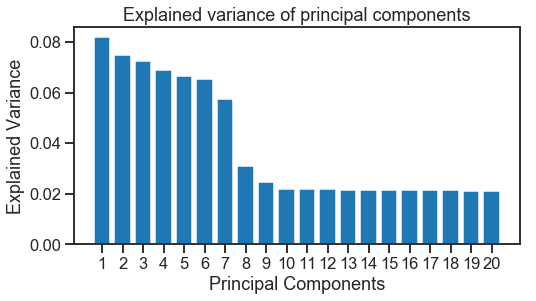

In [14]:
components = range(1,n_comps + 1)
plt.figure(figsize=(8,4))
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of principal components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
#plt.bar(components,eigenvalues)
plt.show()

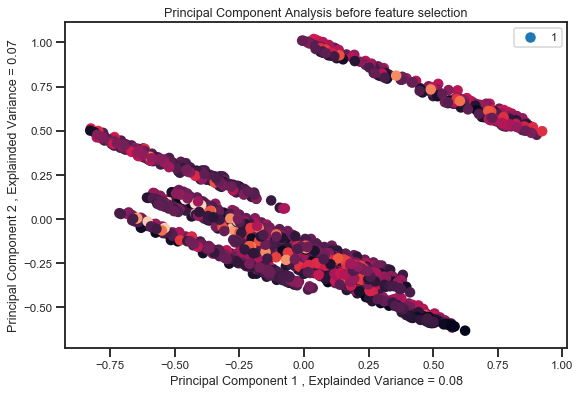

In [15]:
sns.set_context("talk", font_scale=0.7)
plt.figure(figsize=(9,6))
plt.scatter(xpca[0],xpca[1],c=y_co)
plt.xlabel('Principal Component 1 , Explainded Variance = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='upper right')

plt.show()

In [16]:
from mpl_toolkits.mplot3d import Axes3D

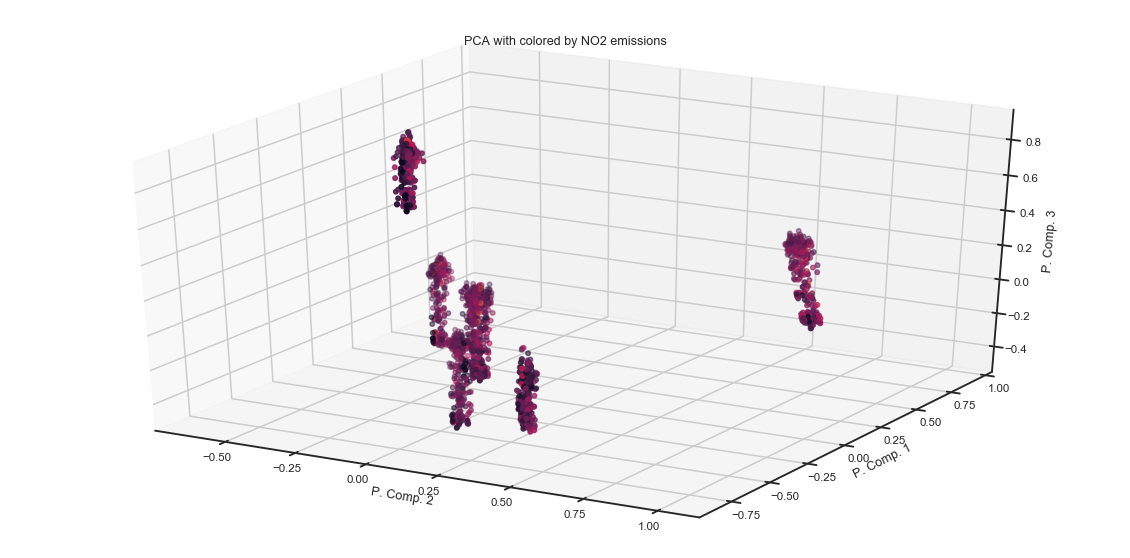

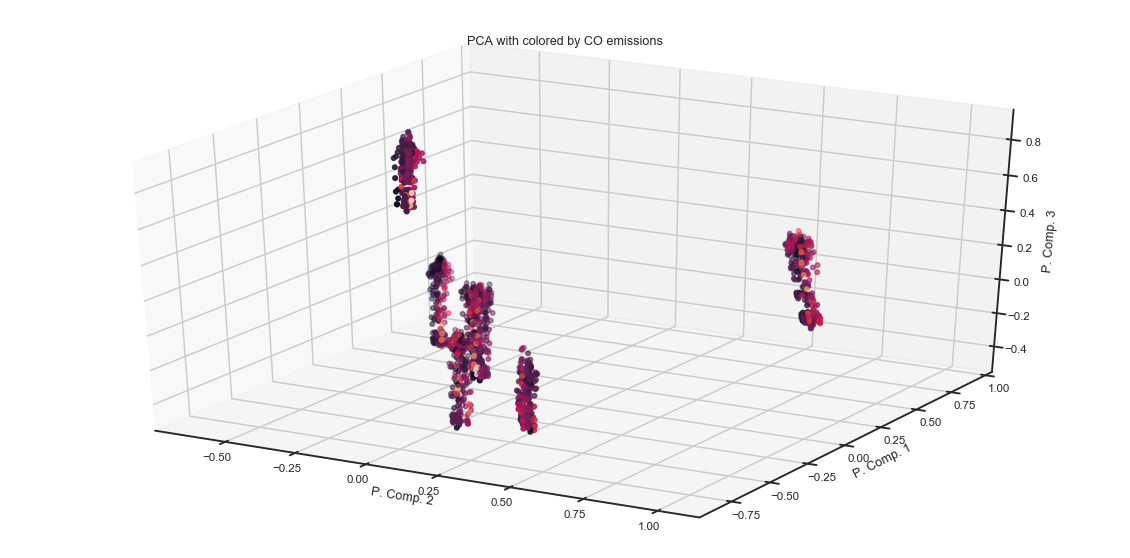

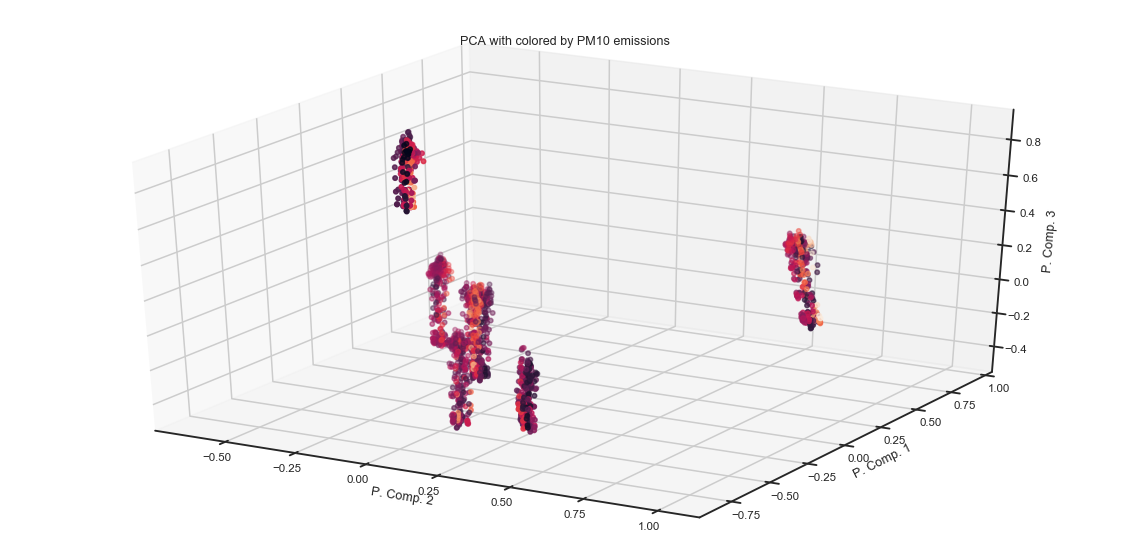

In [17]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xpca[1],xpca[0],xpca[2],c=y_no2)
#ax.scatter(xpca.iloc[(ytrain == 1).ravel(),0], xpca.iloc[(ytrain == 1).ravel(),1], xpca.iloc[(ytrain == 1).ravel(),2])
ax.set_xlabel('P. Comp. 2')
ax.set_ylabel('P. Comp. 1')
ax.set_zlabel('P. Comp. 3')
plt.title('PCA with colored by NO2 emissions')
plt.show()


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xpca[1],xpca[0],xpca[2],c=y_co)
ax.set_xlabel('P. Comp. 2')
ax.set_ylabel('P. Comp. 1')
ax.set_zlabel('P. Comp. 3')
plt.title('PCA with colored by CO emissions')
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xpca[1],xpca[0],xpca[2],c=y_pm10)
ax.set_xlabel('P. Comp. 2')
ax.set_ylabel('P. Comp. 1')
ax.set_zlabel('P. Comp. 3')
plt.title('PCA with colored by PM10 emissions')
plt.show()

Primero intentaremos predecir las emisiones de CO
----------

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

xtrain, xtest, ytrain, ytest = train_test_split(x, y_co, test_size=0.15, random_state=42)

In [19]:
xtrain_fecha = xtrain[['fecha-hora','fecha']]
xtrain.drop(columns=['fecha-hora','fecha'], inplace=True)
xtest_fecha = xtest[['fecha-hora','fecha']]
xtest.drop(columns=['fecha-hora','fecha'], inplace=True)

C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
scaler = MinMaxScaler().fit(xtrain)

C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [21]:
xtrain_scal = scaler.transform(xtrain)
xtest_scal = scaler.transform(xtest)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

Pruebo modelos para CO

In [23]:
lr = LinearRegression()
lr.fit(xtrain_scal, ytrain)
ypred = lr.predict(xtrain_scal)
print('LOS RESULTADOS DE APLICAR UNA REGRESION LINEAL SON LOS SIGUIENTES')
print('RMSEtrain = ' + str(np.sqrt(mean_squared_error(ytrain, ypred))))
ypred = lr.predict(xtest_scal)
print('RMSEtest = ' + str(np.sqrt(mean_squared_error(ytest, ypred))))
print('MSE = ' + str(mean_squared_error(ytest, ypred)))
print('MAE = ' + str(mean_absolute_error(ytest, ypred)))
print('R2 = ' + str(r2_score(ytest,ypred)))

results = pd.DataFrame([['CO','Linear Regression',np.sqrt(mean_squared_error(ytest, ypred)),mean_squared_error(ytest, ypred),mean_absolute_error(ytest, ypred),r2_score(ytest,ypred)]],columns =['medicion','modelo','RMSE','MSE','MAE','R2'])

LOS RESULTADOS DE APLICAR UNA REGRESION LINEAL SON LOS SIGUIENTES
RMSEtrain = 0.14845183205935322
RMSEtest = 0.13790851356824219
MSE = 0.01901875811460204
MAE = 0.10035252072518332
R2 = 0.27715598066055935


In [24]:
neigh = KNeighborsRegressor(weights = "distance")

parameters_knn = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,35,40,45,50]}]
regresor_neigh = GridSearchCV(neigh, parameters_knn, refit = True, cv=5, verbose=True)
neigh.fit(xtrain_scal, ytrain)
ypred = neigh.predict(xtrain_scal)
print('LOS RESULTADOS DE APLICAR KNN SON LOS SIGUIENTES')
print('RMSE train = ' + str(np.sqrt(mean_squared_error(ytrain, ypred))))
ypred = neigh.predict(xtest_scal)
print('RMSE test = ' + str(np.sqrt(mean_squared_error(ytest, ypred))))
print('MSE = ' + str(mean_squared_error(ytest, ypred)))
print('MAE = ' + str(mean_absolute_error(ytest, ypred)))
print('R2 = ' + str(r2_score(ytest,ypred)))

results.append(pd.DataFrame({'medicion' : ['CO'],
                'modelo' : ['KNN'],
                'RMSE test' : [np.sqrt(mean_squared_error(ytest, ypred))],
                'MSE' : [mean_squared_error(ytest, ypred)],
                'MAE' : [mean_absolute_error(ytest, ypred)],
                'R2' : [r2_score(ytest,ypred)]}))

results2 = pd.DataFrame([['CO','KNN',np.sqrt(mean_squared_error(ytest, ypred)),mean_squared_error(ytest, ypred),mean_absolute_error(ytest, ypred),r2_score(ytest,ypred)]],columns =['medicion','modelo','RMSE','MSE','MAE','R2'])
results = results.append(results2,ignore_index=True)

LOS RESULTADOS DE APLICAR KNN SON LOS SIGUIENTES
RMSE train = 0.0
RMSE test = 0.17676942735034704
MSE = 0.031247430445769615
MAE = 0.13021846716401048
R2 = -0.18761793390221815


C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [25]:
svr = SVR()
svr_param = [{'kernel':['linear','rbf'], 'C': [1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}]
svr_cv = GridSearchCV(svr, svr_param, refit = True, cv=5, verbose=True)
svr_cv.fit(xtrain_scal, ytrain)
ypred_train = svr_cv.predict(xtrain_scal)
print('RMSE train = ' + str(np.sqrt(mean_squared_error(ytrain, ypred_train))))
ypred = svr_cv.predict(xtest_scal)
print('RMSE test = ' + str(np.sqrt(mean_squared_error(ytest, ypred))))
print('MSE = ' + str(mean_squared_error(ytest, ypred)))
print('MAE = ' + str(mean_absolute_error(ytest, ypred)))
print('R2 = ' + str(r2_score(ytest,ypred)))
results.append([['CO','SVR',np.sqrt(mean_squared_error(ytest, ypred)),mean_squared_error(ytest, ypred),mean_absolute_error(ytest, ypred)]])

results2 = pd.DataFrame([['CO','SVR',np.sqrt(mean_squared_error(ytest, ypred)),mean_squared_error(ytest, ypred),mean_absolute_error(ytest, ypred),r2_score(ytest,ypred)]],columns =['medicion','modelo','RMSE','MSE','MAE','R2'])
results = results.append(results2,ignore_index=True)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.4min finished
C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RMSE train = 0.13889915781026574
RMSE test = 0.13598942883560078
MSE = 0.01849312475503293
MAE = 0.09873054354039745
R2 = 0.2971336746845509


In [26]:
print('Los mejores parametros son: ' + str(svr_cv.best_params_))
results.head()

Los mejores parametros son: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


,medicion,modelo,RMSE,MSE,MAE,R2
0,CO,Linear Regression,0.137909,0.019019,0.100353,0.277156
1,CO,KNN,0.176769,0.031247,0.130218,-0.187618
2,CO,SVR,0.135989,0.018493,0.098731,0.297134


Text(0.5, 1.0, 'Prediccion (naranja) vs Actual (azul)')

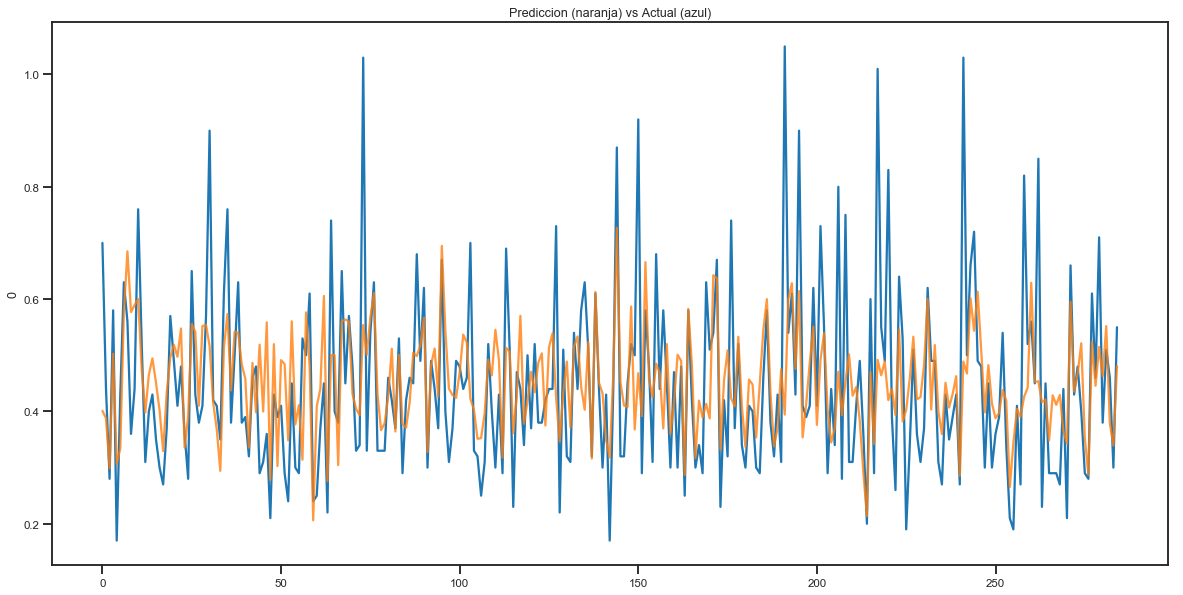

In [27]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(data=ytest.reset_index(drop=True))
sns.lineplot(x=pd.DataFrame(ypred).index,y=pd.DataFrame(ypred)[0], alpha=0.8)
plt.title('Prediccion (naranja) vs Actual (azul)')

Ahora utilizaremos los missing values para hacer predicciones de los datos faltantes y graficaremos para ver si los nuevos valores son consistentes

In [28]:
x_base = x.loc[ (x.fecha == '2/7/2019') | (x.fecha == '2/8/2019') | (x.fecha == '2/9/2019')]
x_base_fecha = x_base['fecha-hora']
y_co_2 = y_co[x_base_fecha.index]
data_prev = pd.concat([y_co_2,x_base_fecha],axis=1)
data_prev.sort_values(by='fecha-hora',inplace=True)

x_base = x.loc[(x.fecha == '2/12/2019') |(x.fecha == '2/13/2019') | (x.fecha == '2/14/2019') ]
x_base_fecha = x_base['fecha-hora']
y_co_2 = y_co[x_base_fecha.index]
data_post = pd.concat([y_co_2,x_base_fecha],axis=1)
data_post.sort_values(by='fecha-hora',inplace=True)

In [29]:
x2 = x.drop(columns=['fecha-hora','fecha'])
x2_scal = scaler.transform(x2)
svr_2 = SVR(kernel='rbf',C=100,gamma=0.01)
params_2 = {'C':[100,1000]}
svr_cv_2 = GridSearchCV(svr_2,param_grid=params_2, cv=5, verbose=True)
svr_cv_2.fit(x2_scal,y_co)

missings_co_to_predict = missing_co.loc[(missing_co.fecha == '2/9/2019') | (missing_co.fecha == '2/10/2019') | (missing_co.fecha == '2/11/2019')]
missings_co_fecha = missings_co_to_predict['fecha-hora']
missing_co_to_scal = missings_co_to_predict.drop(columns=['co_la_boca','no2_la_boca','pm10_la_boca','fecha-hora','fecha'])
missing_co_scaled = scaler.transform(missing_co_to_scal)
missing_y = svr_cv_2.predict(missing_co_scaled)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.4s finished
C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


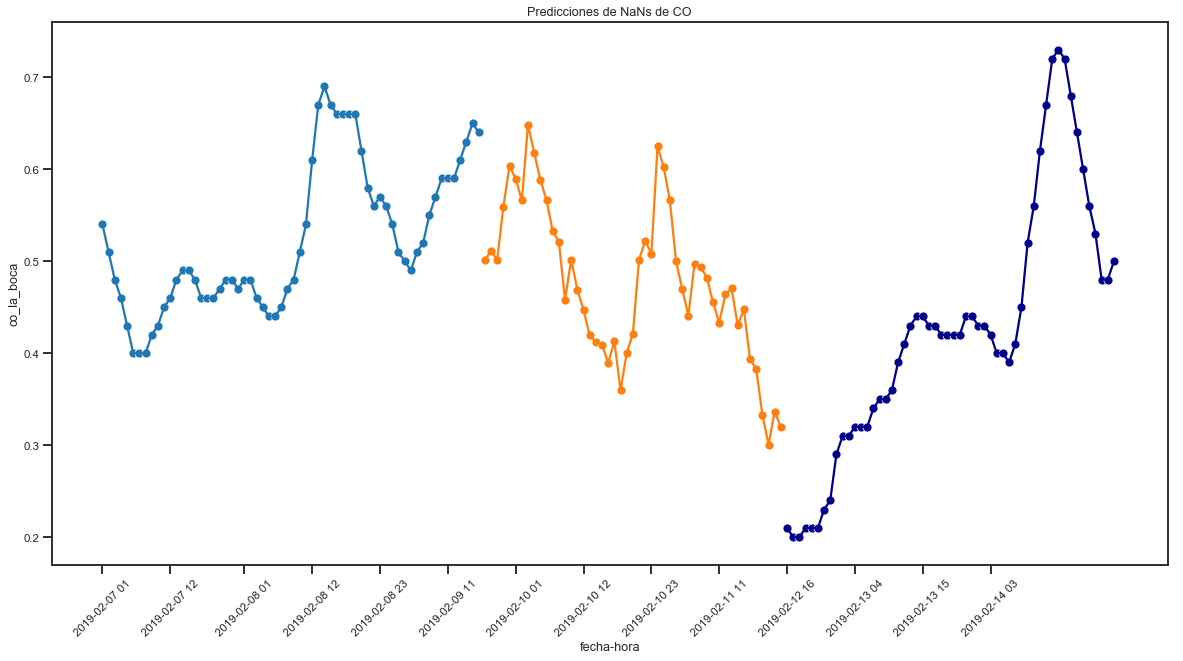

In [30]:
missing_set = pd.concat([pd.DataFrame(missings_co_fecha).reset_index(),pd.DataFrame(missing_y)], axis=1)
missing_set.sort_values(by=['fecha-hora'], inplace=True)

fig = plt.figure(figsize=(20,10))
sns.scatterplot(x='fecha-hora',y='co_la_boca',data=data_prev)
sns.lineplot(x='fecha-hora',y='co_la_boca',data=data_prev)

sns.scatterplot(x='fecha-hora',y=0,data=missing_set)
sns.lineplot(x='fecha-hora',y=0,data=missing_set)

sns.scatterplot(x='fecha-hora',y='co_la_boca',data=data_post,color='darkblue')
sns.lineplot(x='fecha-hora',y='co_la_boca',data=data_post,color='darkblue')

plt.title('Predicciones de NaNs de CO')
plt.xticks(ticks=[0,11,23,34,45,56,67,78,89,100,111,122,133,144],rotation=45)
plt.show()

------------------------------------------------------------
ANALIZO EL NO2
---------------------------------------------------------------

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y_no2, test_size=0.15, random_state=42)

In [32]:
xtrain_fecha = xtrain[['fecha-hora','fecha']]
xtrain.drop(columns=['fecha-hora','fecha'], inplace=True)
xtest_fecha = xtest[['fecha-hora','fecha']]
xtest.drop(columns=['fecha-hora','fecha'], inplace=True)

C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [33]:
scaler = MinMaxScaler().fit(xtrain)
xtrain_scal = scaler.transform(xtrain)
xtest_scal = scaler.transform(xtest)

C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [34]:
lr = LinearRegression()
lr.fit(xtrain_scal, ytrain)
ypred = lr.predict(xtrain_scal)
print('LOS RESULTADOS DE APLICAR UNA REGRESION LINEAL SON LOS SIGUIENTES')
print('RMSEtrain = ' + str(np.sqrt(mean_squared_error(ytrain, ypred))))
ypred = lr.predict(xtest_scal)
print('RMSEtest = ' + str(np.sqrt(mean_squared_error(ytest, ypred))))
print('MSE = ' + str(mean_squared_error(ytest, ypred)))
print('MAE = ' + str(mean_absolute_error(ytest, ypred)))
print('R2 = ' + str(r2_score(ytest,ypred)))

results2 = pd.DataFrame([['NO2','Linear Regression',np.sqrt(mean_squared_error(ytest, ypred)),mean_squared_error(ytest, ypred),mean_absolute_error(ytest, ypred),r2_score(ytest,ypred)]],columns =['medicion','modelo','RMSE','MSE','MAE','R2'])
results = results.append(results2,ignore_index=True)

LOS RESULTADOS DE APLICAR UNA REGRESION LINEAL SON LOS SIGUIENTES
RMSEtrain = 6.703762107813184
RMSEtest = 6.998092205913659
MSE = 48.9732945224695
MAE = 5.157428728070175
R2 = 0.2183030139485136


In [35]:
neigh = KNeighborsRegressor(weights = "distance")

parameters_knn = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,35,40,45,50]}]
regresor_neigh = GridSearchCV(neigh, parameters_knn, refit = True, cv=5, verbose=True)
neigh.fit(xtrain_scal, ytrain)
ypred = neigh.predict(xtrain_scal)
print('LOS RESULTADOS DE APLICAR KNN SON LOS SIGUIENTES')
print('RMSE train = ' + str(np.sqrt(mean_squared_error(ytrain, ypred))))
ypred = neigh.predict(xtest_scal)
print('RMSE test = ' + str(np.sqrt(mean_squared_error(ytest, ypred))))
print('MSE = ' + str(mean_squared_error(ytest, ypred)))
print('MAE = ' + str(mean_absolute_error(ytest, ypred)))
print('R2 = ' + str(r2_score(ytest,ypred)))

results.append(pd.DataFrame({'medicion' : ['NO2'],
                'modelo' : ['KNN'],
                'RMSE test' : [np.sqrt(mean_squared_error(ytest, ypred))],
                'MSE' : [mean_squared_error(ytest, ypred)],
                'MAE' : [mean_absolute_error(ytest, ypred)]}))

results2 = pd.DataFrame([['NO2','KNN',np.sqrt(mean_squared_error(ytest, ypred)),mean_squared_error(ytest, ypred),mean_absolute_error(ytest, ypred),r2_score(ytest,ypred)]],columns =['medicion','modelo','RMSE','MSE','MAE','R2'])
results = results.append(results2,ignore_index=True)

LOS RESULTADOS DE APLICAR KNN SON LOS SIGUIENTES
RMSE train = 0.0
RMSE test = 8.31019064640067
MSE = 69.0592685795252
MAE = 6.1504837787064215
R2 = -0.10230325800864315


C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [36]:
svr = SVR()
svr_param = [{'kernel':['linear','rbf'], 'C': [0.1,1,10,100,1000], 'gamma':[0.01,0.1,1,10]}]
svr_cv = GridSearchCV(svr, svr_param, refit = True, cv=5, verbose=True)
svr_cv.fit(xtrain_scal, ytrain)
ypred_train = svr_cv.predict(xtrain_scal)

print('RMSE train = ' + str(np.sqrt(mean_squared_error(ytrain, ypred_train))))
ypred = svr_cv.predict(xtest_scal)
print('RMSE test = ' + str(np.sqrt(mean_squared_error(ytest, ypred))))
print('MSE = ' + str(mean_squared_error(ytest, ypred)))
print('MAE = ' + str(mean_absolute_error(ytest, ypred)))

results2 = pd.DataFrame([['NO2','SVR',np.sqrt(mean_squared_error(ytest, ypred)),mean_squared_error(ytest, ypred),mean_absolute_error(ytest, ypred),r2_score(ytest,ypred)]],columns =['medicion','modelo','RMSE','MSE','MAE','R2'])
results.append(results2)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.5min finished


RMSE train = 6.107725931876295
RMSE test = 6.898485639024645
MSE = 47.58910411182926
MAE = 4.894530159039211


,medicion,modelo,RMSE,MSE,MAE,R2
0,CO,Linear Regression,0.137909,0.019019,0.100353,0.277156
1,CO,KNN,0.176769,0.031247,0.130218,-0.187618
2,CO,SVR,0.135989,0.018493,0.098731,0.297134
3,NO2,Linear Regression,6.998092,48.973295,5.157429,0.218303
4,NO2,KNN,8.310191,69.059269,6.150484,-0.102303
0,NO2,SVR,6.898486,47.589104,4.894530,0.240397


Text(0.5, 1.0, 'Prediccion (naranja) vs Actual (azul)')

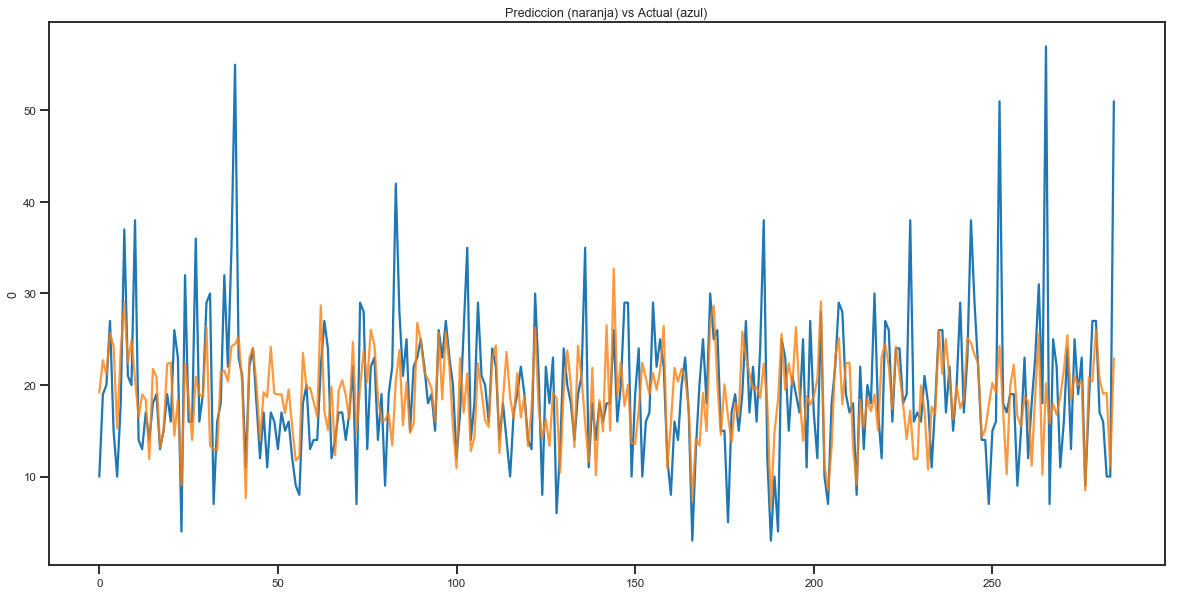

In [37]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(data=ytest.reset_index(drop=True))
sns.lineplot(x=pd.DataFrame(ypred).index,y=pd.DataFrame(ypred)[0], alpha=0.8)
plt.title('Prediccion (naranja) vs Actual (azul)')

In [38]:
x_base = x.loc[ (x.fecha == '2/7/2019') | (x.fecha == '2/8/2019') | (x.fecha == '2/9/2019')]
x_base_fecha = x_base['fecha-hora']
y_no2_2 = y_no2[x_base_fecha.index]
data_prev = pd.concat([y_no2_2,x_base_fecha],axis=1)
data_prev.sort_values(by='fecha-hora',inplace=True)

x_base = x.loc[(x.fecha == '2/12/2019') |(x.fecha == '2/13/2019') | (x.fecha == '2/11/2019') ]
x_base_fecha = x_base['fecha-hora']
y_no2_2 = y_no2[x_base_fecha.index]
data_post = pd.concat([y_no2_2,x_base_fecha],axis=1)
data_post.sort_values(by='fecha-hora',inplace=True)

In [39]:
print('Los mejores parametros son: ' + str(svr_cv.best_params_))

Los mejores parametros son: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [40]:
x2 = x.drop(columns=['fecha-hora','fecha'])
x2_scaled = scaler.transform(x2)
svr_2 = SVR(kernel='rbf',gamma=0.1)
params_2 = {'C':[100]}
svr_cv_2 = GridSearchCV(svr_2,param_grid=params_2, cv=5, verbose=True)
svr_cv_2.fit(x2_scaled,y_no2)

missings_no2_to_predict = missing_no2.loc[(missing_no2.fecha == '2/9/2019') | (missing_no2.fecha == '2/10/2019') | (missing_no2.fecha == '2/11/2019')]
missings_no2_fecha = missings_no2_to_predict['fecha-hora']
missing_no2_to_scal = missings_no2_to_predict.drop(columns=['co_la_boca','no2_la_boca','pm10_la_boca','fecha-hora','fecha'])
missing_no2_scaled = scaler.transform(missing_no2_to_scal)
missing_y = svr_cv_2.predict(missing_no2_scaled)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished


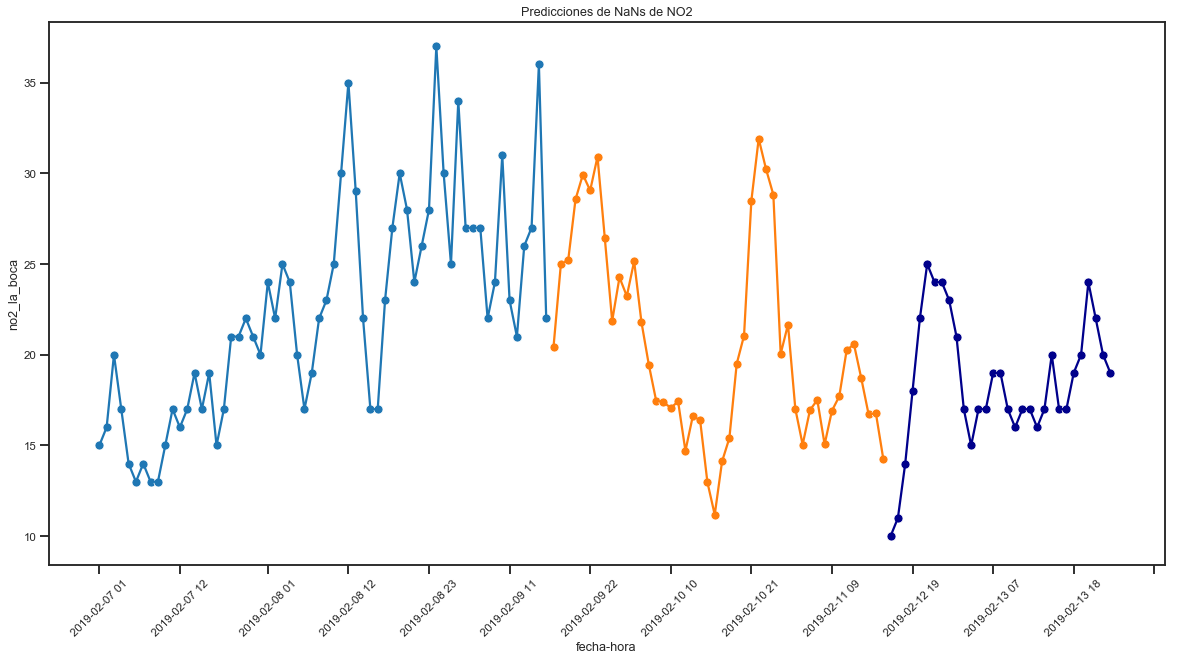

In [41]:
missing_set = pd.concat([pd.DataFrame(missings_no2_fecha).reset_index(),pd.DataFrame(missing_y)], axis=1)
missing_set.sort_values(by=['fecha-hora'], inplace=True)

fig = plt.figure(figsize=(20,10))
sns.scatterplot(x='fecha-hora',y='no2_la_boca',data=data_prev)
sns.lineplot(x='fecha-hora',y='no2_la_boca',data=data_prev)

sns.scatterplot(x='fecha-hora',y=0,data=missing_set)
sns.lineplot(x='fecha-hora',y=0,data=missing_set)

sns.scatterplot(x='fecha-hora',y='no2_la_boca',data=data_post,color='darkblue')
sns.lineplot(x='fecha-hora',y='no2_la_boca',data=data_post,color='darkblue')

plt.title('Predicciones de NaNs de NO2')
plt.xticks(ticks=[0,11,23,34,45,56,67,78,89,100,111,122,133,144],rotation=45)
plt.show()

Analizamos las PM10
--------------------

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y_pm10, test_size=0.15, random_state=42)

In [43]:
xtrain_fecha = xtrain[['fecha-hora','fecha']]
xtrain.drop(columns=['fecha-hora','fecha'], inplace=True)
xtest_fecha = xtest[['fecha-hora','fecha']]
xtest.drop(columns=['fecha-hora','fecha'], inplace=True)

C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [44]:
scaler = MinMaxScaler().fit(xtrain)
xtrain_scal = scaler.transform(xtrain)
xtest_scal = scaler.transform(xtest)

C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [45]:
lr = LinearRegression()
lr.fit(xtrain_scal, ytrain)
ypred = lr.predict(xtrain_scal)
print('LOS RESULTADOS DE APLICAR UNA REGRESION LINEAL SON LOS SIGUIENTES')
print('RMSEtrain = ' + str(np.sqrt(mean_squared_error(ytrain, ypred))))
ypred = lr.predict(xtest_scal)
print('RMSEtest = ' + str(np.sqrt(mean_squared_error(ytest, ypred))))
print('MSE = ' + str(mean_squared_error(ytest, ypred)))
print('MAE = ' + str(mean_absolute_error(ytest, ypred)))
print('R2 = ' + str(r2_score(ytest,ypred)))

results2 = pd.DataFrame([['PM10','Linear Regression',np.sqrt(mean_squared_error(ytest, ypred)),mean_squared_error(ytest, ypred),mean_absolute_error(ytest, ypred),r2_score(ytest,ypred)]],columns =['medicion','modelo','RMSE','MSE','MAE','R2'])
results = results.append(results2,ignore_index=True)

LOS RESULTADOS DE APLICAR UNA REGRESION LINEAL SON LOS SIGUIENTES
RMSEtrain = 8.773749562174027
RMSEtest = 9.290808688644692
MSE = 86.31912608899569
MAE = 7.537431469298245
R2 = 0.05813681158001294


In [46]:
svr = SVR()
svr_param = [{'kernel':['linear','rbf'], 'C': [0.1,1,10,100], 'gamma':[0.01,0.1,1,10]}]
svr_cv = GridSearchCV(svr, svr_param, refit = True, cv=5, verbose=True)
svr_cv.fit(xtrain_scal, ytrain)
ypred_train = svr_cv.predict(xtrain_scal)
print('RMSE train = ' + str(np.sqrt(mean_squared_error(ytrain, ypred_train))))
ypred = svr_cv.predict(xtest_scal)
print('RMSE test = ' + str(np.sqrt(mean_squared_error(ytest, ypred))))
print('MSE = ' + str(mean_squared_error(ytest, ypred)))
print('MAE = ' + str(mean_absolute_error(ytest, ypred)))
print('R2 = ' + str(r2_score(ytest,ypred)))

results2 = pd.DataFrame([['PM10','SVR',np.sqrt(mean_squared_error(ytest, ypred)),mean_squared_error(ytest, ypred),mean_absolute_error(ytest, ypred),r2_score(ytest,ypred)]],columns =['medicion','modelo','RMSE','MSE','MAE','R2'])
results = results.append(results2,ignore_index=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   33.8s finished


RMSE train = 7.5608210192390475
RMSE test = 8.885919493966249
MSE = 78.95956525324938
MAE = 6.851872873681106
R2 = 0.13843998131994106


Text(0.5, 1.0, 'Prediccion (naranja) vs Actual (azul)')

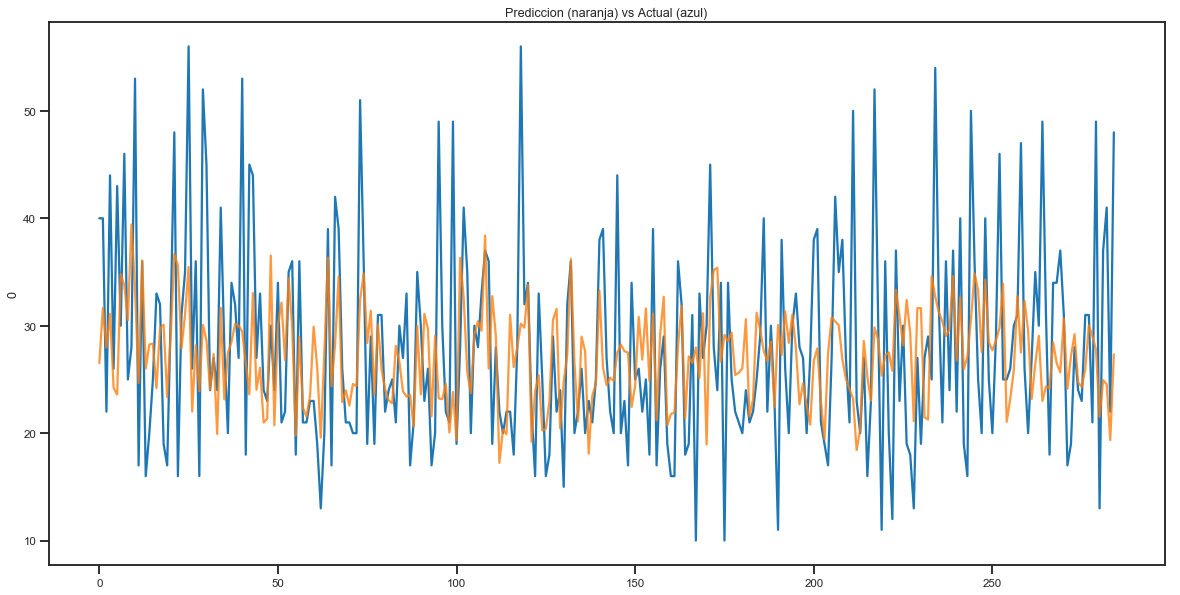

In [47]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(data=ytest.reset_index(drop=True))
sns.lineplot(x=pd.DataFrame(ypred).index,y=pd.DataFrame(ypred)[0], alpha=0.8)
plt.title('Prediccion (naranja) vs Actual (azul)')

In [48]:
x_base = x.loc[ (x.fecha == '2/7/2019') | (x.fecha == '2/8/2019') | (x.fecha == '2/9/2019')]
x_base_fecha = x_base['fecha-hora']
y_pm10_2 = y_pm10[x_base_fecha.index]
data_prev = pd.concat([y_pm10_2,x_base_fecha],axis=1)
data_prev.sort_values(by='fecha-hora',inplace=True)

x_base = x.loc[(x.fecha == '2/12/2019') |(x.fecha == '2/13/2019') | (x.fecha == '2/11/2019') ]
x_base_fecha = x_base['fecha-hora']
y_pm10_2 = y_pm10[x_base_fecha.index]
data_post = pd.concat([y_pm10_2,x_base_fecha],axis=1)
data_post.sort_values(by='fecha-hora',inplace=True)

In [49]:
print('Los mejores parametros son: ' + str(svr_cv.best_params_))

Los mejores parametros son: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [50]:
x2 = x.drop(columns=['fecha-hora','fecha'])
svr_2 = SVR(kernel='rbf',gamma=0.1)
params_2 = {'C':[100]}
svr_cv_2 = GridSearchCV(svr_2,param_grid=params_2, cv=5, verbose=True)
x2_scaled = scaler.transform(x2)
svr_cv_2.fit(x2_scaled,y_pm10)

missings_pm10_to_predict = missing_pm10.loc[(missing_pm10.fecha == '2/9/2019') | (missing_pm10.fecha == '2/10/2019') | (missing_pm10.fecha == '2/11/2019')]
missings_pm10_fecha = missings_pm10_to_predict['fecha-hora']
missing_pm10_to_scal = missings_pm10_to_predict.drop(columns=['co_la_boca','no2_la_boca','pm10_la_boca','fecha-hora','fecha'])
missing_pm10_scaled = scaler.transform(missing_pm10_to_scal)
missing_y = svr_cv_2.predict(missing_pm10_scaled)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished
C:\Users\Ezequiel Vannucchi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


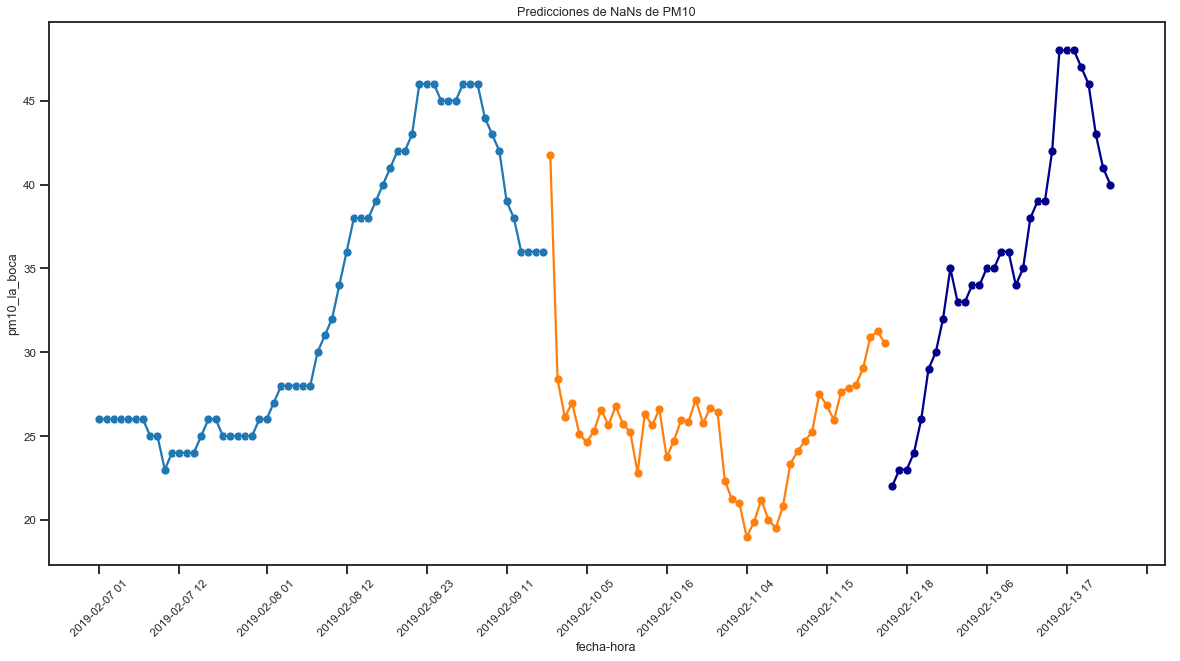

In [51]:
missing_set = pd.concat([pd.DataFrame(missings_pm10_fecha).reset_index(),pd.DataFrame(missing_y)], axis=1)
missing_set.sort_values(by=['fecha-hora'], inplace=True)

fig = plt.figure(figsize=(20,10))
sns.scatterplot(x='fecha-hora',y='pm10_la_boca',data=data_prev)
sns.lineplot(x='fecha-hora',y='pm10_la_boca',data=data_prev)

sns.scatterplot(x='fecha-hora',y=0,data=missing_set)
sns.lineplot(x='fecha-hora',y=0,data=missing_set)

sns.scatterplot(x='fecha-hora',y='pm10_la_boca',data=data_post,color='darkblue')
sns.lineplot(x='fecha-hora',y='pm10_la_boca',data=data_post,color='darkblue')

plt.title('Predicciones de NaNs de PM10')
plt.xticks(ticks=[0,11,23,34,45,56,67,78,89,100,111,122,133,144],rotation=45)
plt.show()

Comparacion de Resultados
-----------

In [52]:
results

,medicion,modelo,RMSE,MSE,MAE,R2
0,CO,Linear Regression,0.137909,0.019019,0.100353,0.277156
1,CO,KNN,0.176769,0.031247,0.130218,-0.187618
2,CO,SVR,0.135989,0.018493,0.098731,0.297134
3,NO2,Linear Regression,6.998092,48.973295,5.157429,0.218303
4,NO2,KNN,8.310191,69.059269,6.150484,-0.102303
5,PM10,Linear Regression,9.290809,86.319126,7.537431,0.058137
6,PM10,SVR,8.885919,78.959565,6.851873,0.138440
